# EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

### PCA

In [2]:
# --- 1. Load Your Saved Data ---
scaled_data_filepath = "data/processed/data_B_scaled.csv"
labels_filepath = "data/processed/data_B_labels.csv"

In [3]:
# Load X (features), setting the first column (sample_id) as the index
X = pd.read_csv(scaled_data_filepath, index_col='sample_id')

# Load y (labels), setting the first column (sample_id) as the index
y = pd.read_csv(labels_filepath, index_col='sample_id')

print(f"Loaded X (features) with shape: {X.shape}")
print(f"Loaded y (labels) with shape: {y.shape}")

# --- 2. Run PCA ---
# We already scaled the data, so we can run PCA directly
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)

# Get the variance explained by each component
variance_explained = pca.explained_variance_ratio_
pc1_var = variance_explained[0] * 100
pc2_var = variance_explained[1] * 100

print("PCA complete.")

# --- 3. Create PCA Results DataFrame ---
# Put the PCA results into a DataFrame
pca_df = pd.DataFrame(
    data_pca,
    columns=['PC1', 'PC2'],
    index=X.index # Use the sample IDs from X as the index
)

# --- 4. Add Metadata for Plotting ---
# Add the 0/1 labels from our 'y' file
pca_df['label_id'] = y['label']

# Create a meaningful label for plotting
pca_df['Diagnosis'] = pca_df['label_id'].map({
    1: 'GBM (Unhealthy)',
    0: 'Healthy (GTEX)'
})

# CLEVER TRICK: We can infer the batch from the sample_id
# This creates a new column ('TCGA' or 'GTEX')
pca_df['Batch (Study)'] = ['TCGA' if 'TCGA' in idx else 'GTEX' for idx in pca_df.index]

print("PCA results merged with labels. Ready to plot.")
display(pca_df.head())

Loaded X (features) with shape: (1814, 130)
Loaded y (labels) with shape: (1814, 1)
PCA complete.
PCA results merged with labels. Ready to plot.


,PC1,PC2,label_id,Diagnosis,Batch (Study)
sample_id,,,,,
TCGA-19-1787-01,6.109324,-4.926879,1,GBM (Unhealthy),TCGA
TCGA-S9-A7J2-01,7.748781,-1.894015,1,GBM (Unhealthy),TCGA
GTEX-13QIC-0011-R1a-SM-5O9CJ,-1.843826,2.472735,0,Healthy (GTEX),GTEX
TCGA-E1-A7YI-01,10.026229,-2.347092,1,GBM (Unhealthy),TCGA
TCGA-06-5412-01,3.258005,-7.148716,1,GBM (Unhealthy),TCGA


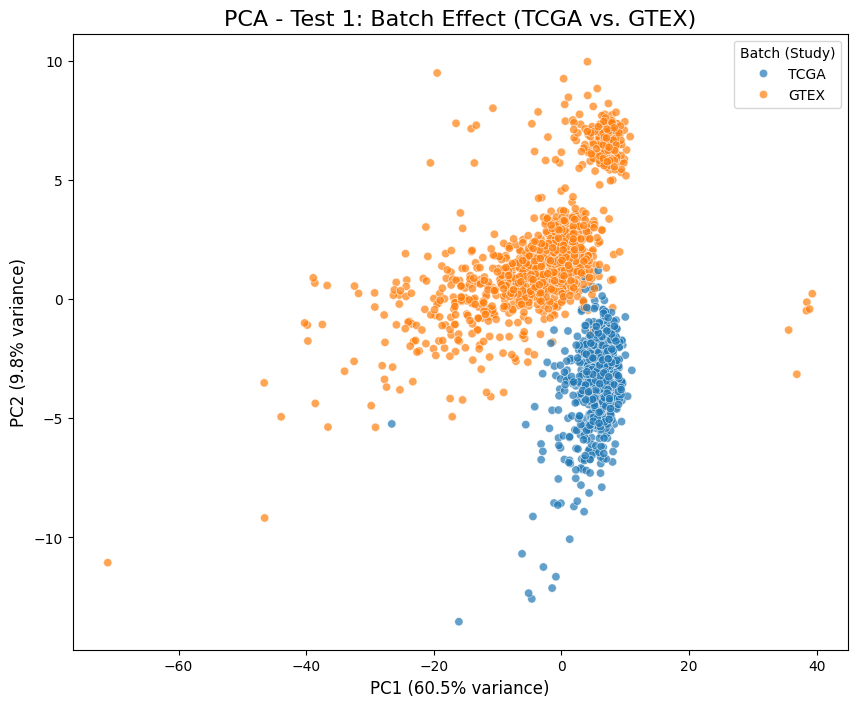

In [4]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Batch (Study)', # Color by our inferred batch
    alpha=0.7
)
plt.title('PCA - Test 1: Batch Effect (TCGA vs. GTEX)', fontsize=16)
plt.xlabel(f'PC1 ({pc1_var:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pc2_var:.1f}% variance)', fontsize=12)
plt.legend(title='Batch (Study)')
plt.show()

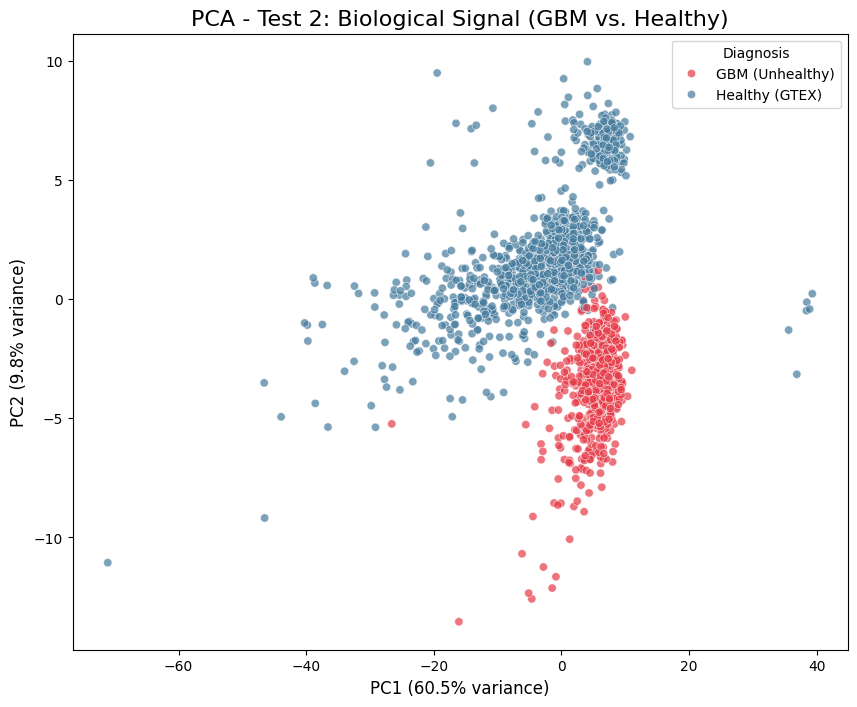

In [ ]:
# plt.figure(figsize=(10, 8))
# sns.scatterplot(
#     data=pca_df,
#     x='PC1',
#     y='PC2',
#     hue='Diagnosis', # Color by our new biological label
#     palette={'GBM (Unhealthy)': '#E63946', 'Healthy (GTEX)': '#457B9D'},
#     alpha=0.7
# )
# plt.title('PCA - Test 2: Biological Signal (GBM vs. Healthy)', fontsize=16)
# plt.xlabel(f'PC1 ({pc1_var:.1f}% variance)', fontsize=12)
# plt.ylabel(f'PC2 ({pc2_var:.1f}% variance)', fontsize=12)
# plt.legend(title='Diagnosis')
# plt.show()